In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV files
file1 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max5/MvSR_results.csv')
file2 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max9/MvSR_results.csv')
file3 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max15/MvSR_results.csv')
file4 = pd.read_csv('/home/anava/projects/MvSR-analysis/toy_results/degeneracy_paths_2D_90/perfect/max25/MvSR_results.csv')

# Combine into a single DataFrame for ease of processing
df = pd.concat([file1, file2, file3, file4], ignore_index=True)
df = df.drop_duplicates(subset=['expression'])

# Function to parse the losses
def parse_losses(losses):
    return list(map(float, losses.strip('[]').split(',')))

# Apply parsing to the losses column
df['losses'] = df['losses'].apply(parse_losses)

# Calculate summary statistics
summary_stats = df['losses'].apply(lambda x: pd.Series({
    'mean': np.mean(x),
    'median': np.median(x),
    'std_dev': np.std(x)
}))

# Add the summary statistics to the original DataFrame
df = pd.concat([df, summary_stats], axis=1)

df['DoF'] = df['expression'].str.count(r'[A-Z]')




In [16]:
df.sort_values(by='mean')
#print(df_sorted['expression'][:5])

,expression,losses,mean,median,std_dev,DoF
338,-A*X1 - B*X2 - C*(D*X2 + E)/(F*X2 + G*exp(-H*X...,"[0.036481119813586094, 0.0030789046580705134, ...",0.011135,0.002892,0.027500,16
227,A*(-B*X1 + C*X2 + D)*(-E*X1**2 - F*X1 + G) + H,"[0.04072543874517744, 0.004438397161788395, 0....",0.014384,0.003089,0.033573,12
232,-A*X1**0.5 + B*X1 - C*X2 - D*(-E*X2 - F)*exp(-...,"[0.01528388440983059, 0.0028231072768221278, 0...",0.015735,0.009741,0.016294,13
202,-A*X1 - B*X2**2 + C*X2 + D + E/X1,"[0.016261756810378322, 0.002941396371789716, 0...",0.017758,0.009053,0.022937,9
334,A*(B - C*X1)*(-D*X1 + E*exp(-F*X1 + G*X2) - H)...,"[0.040886521727406075, 0.003571833557785822, 0...",0.020419,0.014516,0.028941,13
...,...,...,...,...,...,...
286,A*X1**0.5 - B*X1 + C*X2 + D*log(E*X1) - F,"[0.2467298632432857, 6.278784136368389, 0.4303...",2.267015,0.431539,5.647626,10
354,-A*X2**2 + B*X2 + C*(-D*X1 - E)*log(F*X1) + G,"[12.941460110817667, 0.002307985639235115, 8.1...",3.487529,0.019177,6.848233,11
257,-A*X1 + B*X2 + C*log(D*X1) + E*log(F*X1) + G,"[0.28321887317128375, 5.65548602400711, 0.4304...",4.078954,0.431814,8.247420,11
345,-A*(-B*X1 - C*X2)*(-D*X2 - E) + F*(G*X2 + H)*l...,"[0.021993620616038916, 10.173190334564916, 0.0...",5.712948,0.043557,11.307713,15


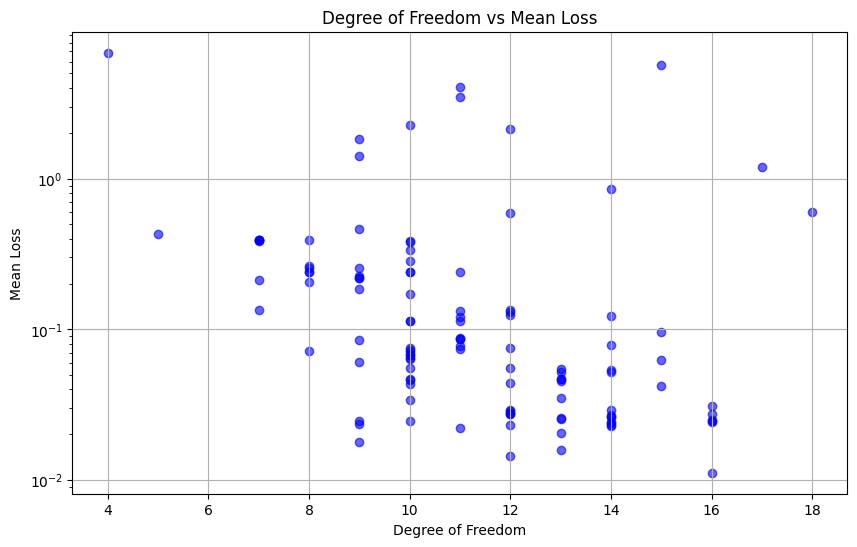

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DoF'], df['mean'], color='blue', alpha=0.6)
plt.title('Degree of Freedom vs Mean Loss')
plt.xlabel('Degree of Freedom')
plt.ylabel('Mean Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

In [23]:
def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        is_efficient[i] = not np.any(np.all(costs <= c, axis=1) & np.any(costs < c, axis=1))
    return is_efficient

# Convert loss arrays to numpy array for processing
loss_array = np.array(df["losses"].tolist())

# Identify Pareto optimal points
pareto_mask = is_pareto_efficient(loss_array)
pareto_df = df[pareto_mask]

In [19]:
pareto_df.sort_values(by='mean')

,expression,losses,mean,median,std_dev,DoF
338,-A*X1 - B*X2 - C*(D*X2 + E)/(F*X2 + G*exp(-H*X...,"[0.036481119813586094, 0.0030789046580705134, ...",0.011135,0.002892,0.027500,16
227,A*(-B*X1 + C*X2 + D)*(-E*X1**2 - F*X1 + G) + H,"[0.04072543874517744, 0.004438397161788395, 0....",0.014384,0.003089,0.033573,12
232,-A*X1**0.5 + B*X1 - C*X2 - D*(-E*X2 - F)*exp(-...,"[0.01528388440983059, 0.0028231072768221278, 0...",0.015735,0.009741,0.016294,13
202,-A*X1 - B*X2**2 + C*X2 + D + E/X1,"[0.016261756810378322, 0.002941396371789716, 0...",0.017758,0.009053,0.022937,9
334,A*(B - C*X1)*(-D*X1 + E*exp(-F*X1 + G*X2) - H)...,"[0.040886521727406075, 0.003571833557785822, 0...",0.020419,0.014516,0.028941,13
...,...,...,...,...,...,...
389,-A*X1 + B*(C*X2 + D)/log(E*X1) - F,"[0.0443276837239173, 0.09739161726076269, 0.00...",0.463598,0.022617,1.830420,9
353,A*(-B*X2 + C*(D*X1 + E*X2 + F)**2)*(G*X2 - exp...,"[7.1258057913646375, 7.084594098503977, 0.0033...",0.601638,0.005334,1.786653,18
262,A*X1 + B*X2 + C*(-D*X2 - E)*log(F*X1) + G - H*...,"[0.029990888770170088, 0.03016169269665133, 0....",0.848597,0.005710,3.549865,14
357,-A*X1*(B*X2 + C) + D*X1 + E*X2 - F*(exp(-G*X1 ...,"[0.17766365383768837, 0.003684088078521979, 0....",1.204048,0.006807,3.943401,17


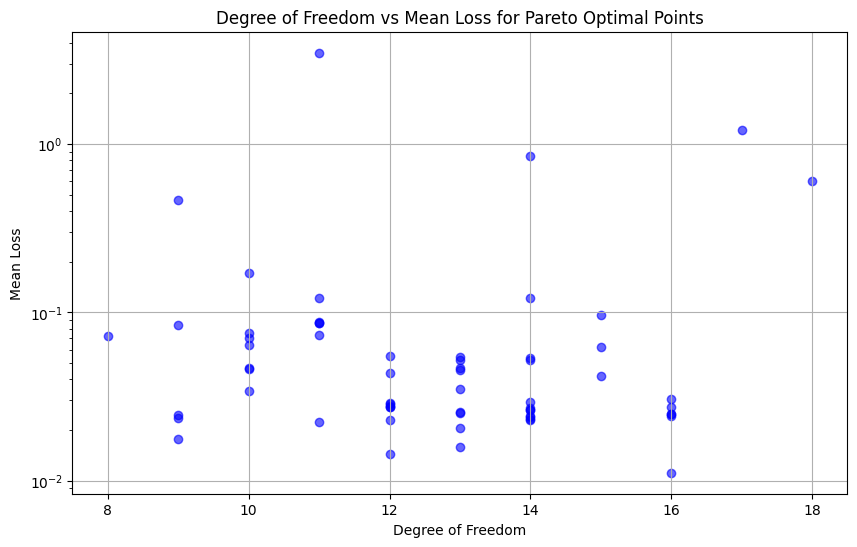

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(pareto_df['DoF'], pareto_df['mean'], color='blue', alpha=0.6)
plt.title('Degree of Freedom vs Mean Loss for Pareto Optimal Points')
plt.xlabel('Degree of Freedom')
plt.ylabel('Mean Loss')
plt.yscale('log')
plt.grid(True)
plt.show()

In [28]:
sorted = pareto_df.drop(columns=['losses']).sort_values(by='mean').head(10)
print(3)

KeyboardInterrupt: 

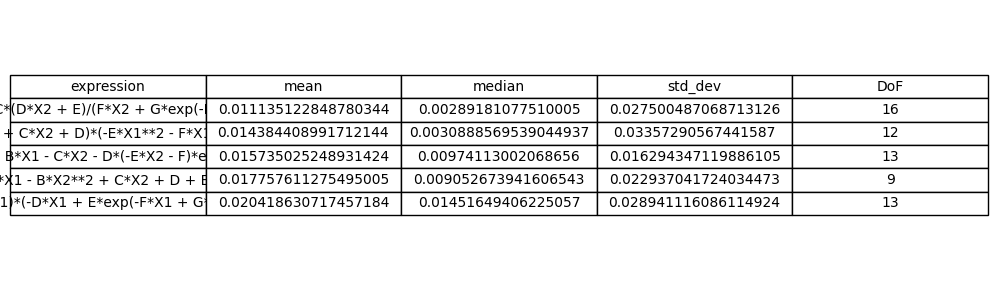

In [21]:
pareto_df = pareto_df.drop(columns=['losses']).sort_values(by='mean').head(5)

# Convert first 5 rows to a PNG
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=pareto_df.values, colLabels=pareto_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(3)
table.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig("/home/anava/projects/MvSR-analysis/pareto_optimal_expressions.png", dpi=300)
